In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import glob
import subprocess

In [2]:
# ========== Ищем плотность меди ==========
h = 4.05
d = 1.295
m = 40.417

ro_cuprum = 4 * m / (np.pi * d * d * h)
print("Плотность меди: {:.2f} г/cм**3".format(ro_cuprum))

Плотность меди: 7.58 г/cм**3


In [3]:
def save_png(measures, filename, table_name="", columns=[u"#", u"Frequency, kHz"]):
    dataframe = pd.DataFrame(data=measures, 
                                 index=range(1, len(measures) + 1), 
                                 columns=columns)
    if columns[0] == "#":
        dataframe[columns[0]] = dataframe[columns[0]].astype('int32')
    dataframe.to_html("{}.html".format(filename))
#============================= Adding caption =========================
    with open("{}.html".format(filename), "r") as fin:
        lines = fin.readlines()

    lines = lines[0:1] + [u"<caption>{}</caption>\n".format(table_name)] + lines[1:]
    with open("{}.html".format(filename), "w") as fout:
        for line in lines:
            print(line, file=fout)
#======================================================================
    subprocess.call("wkhtmltoimage -f png --width 0 {}.html {}.png".format(filename, filename), shell=True)
#============================ Clean up ================================
    files = glob.glob('{}.html'.format(filename))
    for f in files:
        os.remove(f)

In [4]:
# ========================= Измерения ===========================

cuprum_measures = np.array(
                    [
                        [0, 0],
                        [1, 3.214589],
                        [2, 6.424578],
                        [3, 9.632971],
                        [4, 12.858356],
                        [5, 16.072945]
                    ])

dural_measures = np.array(
               [
                 [0, 0],
                 [1, 4.241488], 
                 [2, 8.506973],
                 [3, 12.73035],
                 [4, 16.96195]
               ])

steal_measures = np.array(
                [
                 [0, 0],
                 [1, 4.120289], 
                 [2, 8.244774],
                 [3, 12.646795],
                 [4, 16.48195]
                ])

afc_measures = np.array(
                [
                    [4240.37, 6],
                    # ниже резонансa
                    [4240.22, 5.8],
                    [4240.02, 5.4],
                    [4239.92, 5.2],
                    [4239.82, 4.8],
                    [4239.72, 4.6],
                    [4239.62, 4.3],
                    [4239.51, 4.00],
                    [4239.42, 3.8],
                    [4239.32, 3.56],
                    [4239.22, 3.3],
                    [4239.12, 3.1],
                    [4238.92, 2.7],
                    [4238.52, 2.5],
                    #выше резонанса 
                    [4240.52, 5.8],
                    [4240.62, 5.6],
                    [4240.72, 5.4],
                    [4240.82, 5.1],
                    [4240.92, 4.8],
                    [4241.02, 4.5],
                    [4241.12, 4.2],
                    [4241.22, 3.9],
                    [4241.32, 3.7],
                    [4241.42, 3.5],
                    [4241.52, 3.3],
                    [4241.62, 3.1],
                    [4242.02, 2.55],
                    [4242.32, 2.4]
                ])


In [5]:
save_png(cuprum_measures, 'youngs_measures_cuprum',
        table_name="Measures [Cuprum]")
save_png(dural_measures, 'youngs_measures_dural',
        table_name="Measures [Duraluminium]")
save_png(steal_measures, 'youngs_measures_steal',
        table_name="Measures [Steal]")
save_png(afc_measures, 'youngs_measures_afc', columns=["Frequency, kHz", "Amplitude"],
        table_name="Measures [Amplitude-Frequency characteristics]")

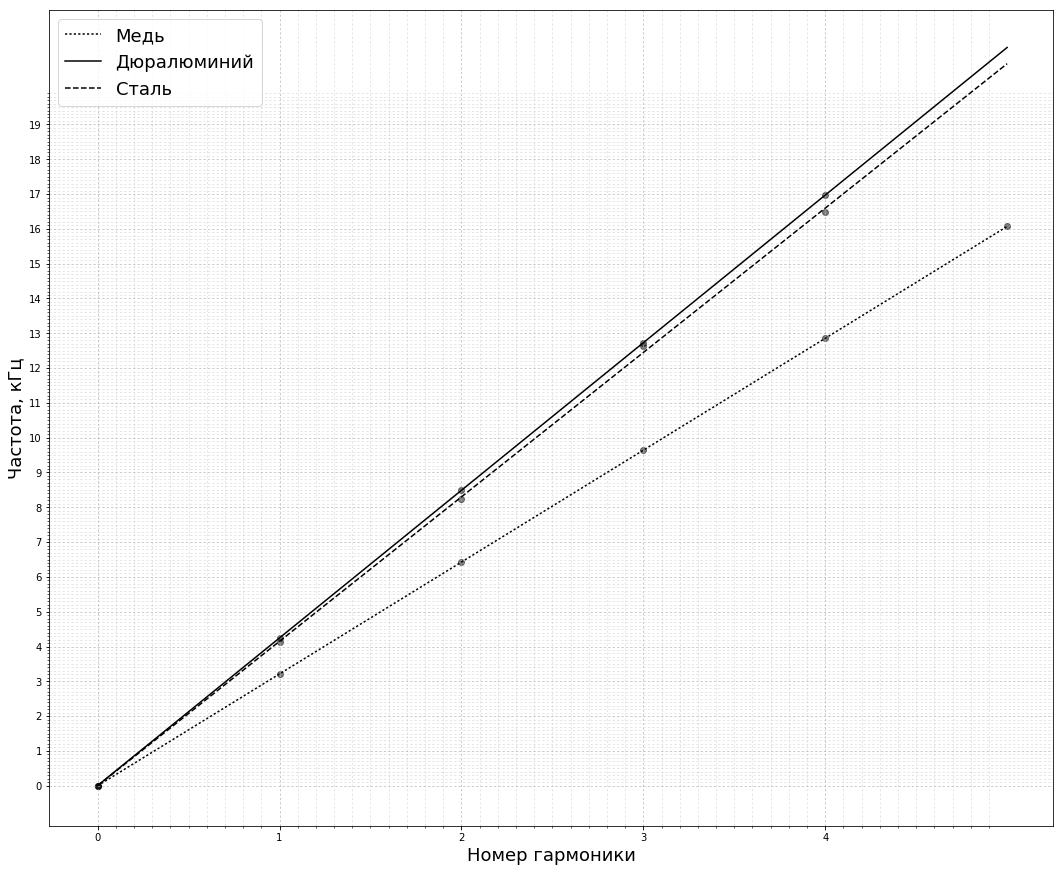

In [6]:

ax = plt.figure(figsize=(18, 15)).add_subplot(1, 1, 1)
grid = np.linspace(np.min(cuprum_measures[:, 0]), np.max(cuprum_measures[:, 0]), 500)

for measures, linestyle, label in zip([cuprum_measures, dural_measures, steal_measures],
                                      ['dotted', 'solid', '--'],
                                      ['Медь', 'Дюралюминий', 'Сталь']):
    k, b = np.polyfit(measures[:, 0], measures[:, 1], 1)
    ax.scatter(measures[:, 0], measures[:, 1], color='black', alpha=0.5)
    ax.plot(grid, k * grid + b, color='black', label=label, ls=linestyle)
    
minor_xticks = np.arange(0, 5, 0.1)
major_xticks = np.arange(0, 5, 1)
minor_yticks = np.arange(0, 20, 0.1)
major_yticks = np.arange(0, 20, 1)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.4, ls=':')
ax.grid(which='major', alpha=0.6, ls=':')

plt.xlabel("Номер гармоники", fontsize=18)
plt.ylabel("Частота, кГц",fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.savefig("youngs_graphics_all harmonics.png")
plt.show()

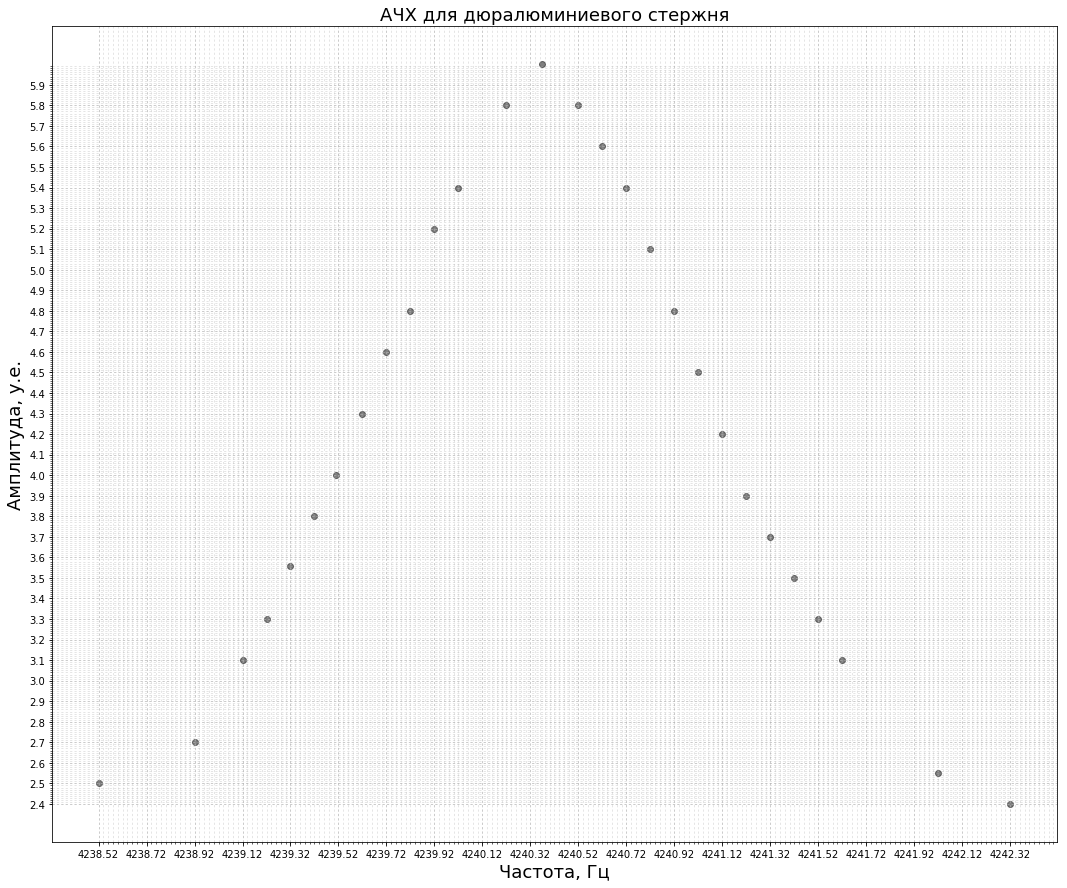

In [12]:
ax = plt.figure(figsize=(18, 15)).add_subplot(1, 1, 1)
ax.scatter(afc_measures[:, 0],
            afc_measures[:, 1], color='black', alpha=0.5)

minor_xticks = np.arange(np.min(afc_measures[:, 0]), np.max(afc_measures[:, 0]) + 0.2, 0.02)
major_xticks = np.arange(np.min(afc_measures[:, 0]), np.max(afc_measures[:, 0]) + 0.2, 0.2)
minor_yticks = np.arange(np.min(afc_measures[:, 1]), np.max(afc_measures[:, 1]), 0.01)
major_yticks = np.arange(np.min(afc_measures[:, 1]), np.max(afc_measures[:, 1]), 0.1)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.4, ls=':')
ax.grid(which='major', alpha=0.6, ls=':')

plt.title("АЧХ для дюралюминиевого стержня", fontsize=18)
plt.xlabel("Частота, Гц", fontsize=18)
plt.ylabel("Амплитуда, у.е.", fontsize=18)
plt.savefig("youngs_graphics_afc.png")
plt.show()